# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Audrey Roselian
- **Email:** m293d4kx2739@bangkit.academy
- **ID Dicoding:** 7601470

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara kondisi cuaca dalam per hari dan per jam dengan jumlah penyewaan sepeda?
- Bagaimana perbedaan dalam pola penggunaan sepeda antara hari kerja dan hari libur?
- Pada musim apa penyewaan sepeda meningkat signifikan?
- Bagaimana pola jumlah penyewaan sepeda berbeda-beda berdasarkan musim dan hari kerja?


## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
day_df = pd.read_csv('/content/drive/MyDrive/archive/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv('/content/drive/MyDrive/archive/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Day_df**

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pemeriksaan tipe data dengan method info() dan isna(), secara keseluruhan day_df tidak ada missing value. Namun, terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan datetime bukan sebagai object.

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan method duplicated() dan describe(), tidak ditemukan adanya duplikasi dan keanehan pada nilai day_df.

**hour_df**

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pemeriksaan tipe data dengan method info() dan isna(), secara keseluruhan hour_df tidak ada missing value. Namun, terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan datetime bukan sebagai object.

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan method duplicated() dan describe(), tidak ditemukan adanya duplikasi dan keanehan pada nilai hour_df.

### Cleaning Data

Memperbaiki kesalahan tipe data untuk kolom dteday pada day_df & hour_df.

In [17]:
day_df['dteday']= pd.to_datetime(day_df['dteday'])

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
hour_df['dteday']= pd.to_datetime(hour_df['dteday'])

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [21]:
day_df.describe(include="all")

<ipython-input-21-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah pengamatan dalam rentang waktu dua tahun (2011 dan 2012) adalah sebanyak 731. Selama periode tersebut, data mencatat rata-rata 3656 pengguna yang terdaftar menggunakan layanan sepeda setiap hari. Variasi jumlah pengguna yang terdaftar dalam satu hari terlihat cukup signifikan, dengan rentang antara 20 hingga 6946 pengguna. Untuk pengguna tidak terdaftar memiliki rata rata 848 pengguna dengan variasi jumlah pengguna tidak terdaftar dalam satu hari 2 hingga 3410 sebagai pengguna sepeda. Hal ini menunjukkan adanya fluktuasi yang cukup besar dalam penggunaan sepeda dari waktu ke waktu.

### Explore Data hour_df

In [22]:
hour_df.describe(include="all")

<ipython-input-22-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa jumlah pengamatan dalam rentang waktu dua tahun (2011 dan 2012) dalam hitungan jam adalah sebanyak 17379. Selama periode tersebut, data mencatat rata-rata 153 pengguna yang terdaftar menggunakan layanan sepeda per jam. Variasi jumlah pengguna yang terdaftar per jam terlihat cukup signifikan, dengan rentang antara 0 hingga 886 pengguna. Untuk pengguna tidak terdaftar memiliki rata rata 35 pengguna dengan variasi jumlah pengguna tidak terdaftar per jam adalah 0 hingga 367 sebagai pengguna sepeda. Hal ini menunjukkan adanya fluktuasi yang cukup besar dalam penggunaan sepeda dari waktu ke waktu dalam hitungan jam.

In [23]:
print(hour_df['weathersit'].unique())

[1 2 3 4]


In [24]:
print(day_df['weathersit'].unique())

[2 1 3]


### Explore Merged

In [25]:
mergebike_df = pd.merge(hour_df, day_df, on ='dteday', how='inner',suffixes=('_hour', '_day'))
mergebike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Penggabungan mergebike_df ditujukan untuk mengkonsolidasikan data menjadi satu DataFrame yang mencakup informasi detail per jam dan per hari.

Mengubah label angka menjadi kata yang sesuai dengan label:

In [26]:
weather = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
mergebike_df['weathersit_day'] = mergebike_df['weathersit_day'].replace(weather)
mergebike_df['weathersit_hour'] = mergebike_df['weathersit_hour'].replace(weather)


In [27]:
print(mergebike_df['weathersit_day'].unique())

['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']


In [28]:
print(mergebike_df['weathersit_hour'].unique())

['Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']


In [29]:
season = {
    1:'Springer',
    2:'Summer',
    3:'Fall',
    4:'Winter'
}

mergebike_df['season_day'] = mergebike_df['season_day'].replace(season)

In [30]:
print(mergebike_df['season_day'].unique())

['Springer' 'Summer' 'Fall' 'Winter']


In [31]:
print("Deskripsi Kondisi Cuaca per Jam:")
print(mergebike_df['weathersit_hour'].describe())

Deskripsi Kondisi Cuaca per Jam:
count                                               17379
unique                                                  4
top       Clear, Few clouds, Partly cloudy, Partly cloudy
freq                                                11413
Name: weathersit_hour, dtype: object


In [32]:
print("\nDeskripsi Kondisi Cuaca per Hari:")
print(mergebike_df['weathersit_day'].describe())


Deskripsi Kondisi Cuaca per Hari:
count                                               17379
unique                                                  3
top       Clear, Few clouds, Partly cloudy, Partly cloudy
freq                                                11040
Name: weathersit_day, dtype: object


In [33]:
print("\nDeskripsi Jumlah Penyewaan Sepeda per Jam:")
print(mergebike_df['cnt_hour'].describe())


Deskripsi Jumlah Penyewaan Sepeda per Jam:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt_hour, dtype: float64


In [34]:
print("\nDeskripsi Jumlah Penyewaan Sepeda per Hari:")
print(mergebike_df['cnt_day'].describe())


Deskripsi Jumlah Penyewaan Sepeda per Hari:
count    17379.000000
mean      4533.692963
std       1917.376947
min         22.000000
25%       3214.000000
50%       4563.000000
75%       5986.000000
max       8714.000000
Name: cnt_day, dtype: float64


In [35]:
weekday_rentals = mergebike_df[mergebike_df['workingday_day'] == 1]['cnt_day']
print("Statistik Deskriptif untuk Jumlah Penyewaan Sepeda pada Hari Kerja:")
print(weekday_rentals.describe())

Statistik Deskriptif untuk Jumlah Penyewaan Sepeda pada Hari Kerja:
count    11865.000000
mean      4622.855204
std       1848.635641
min         22.000000
25%       3392.000000
50%       4590.000000
75%       6073.000000
max       8362.000000
Name: cnt_day, dtype: float64


In [36]:
weekend_rentals = mergebike_df[mergebike_df['workingday_day'] == 0]['cnt_day']
print("\nStatistik Deskriptif untuk Jumlah Penyewaan Sepeda pada Akhir Pekan:")
print(weekend_rentals.describe())


Statistik Deskriptif untuk Jumlah Penyewaan Sepeda pada Akhir Pekan:
count    5514.000000
mean     4341.834059
std      2044.550623
min       605.000000
25%      2732.000000
50%      4459.000000
75%      5923.000000
max      8714.000000
Name: cnt_day, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara kondisi cuaca dalam per hari dan per jam dengan jumlah penyewaan sepeda?

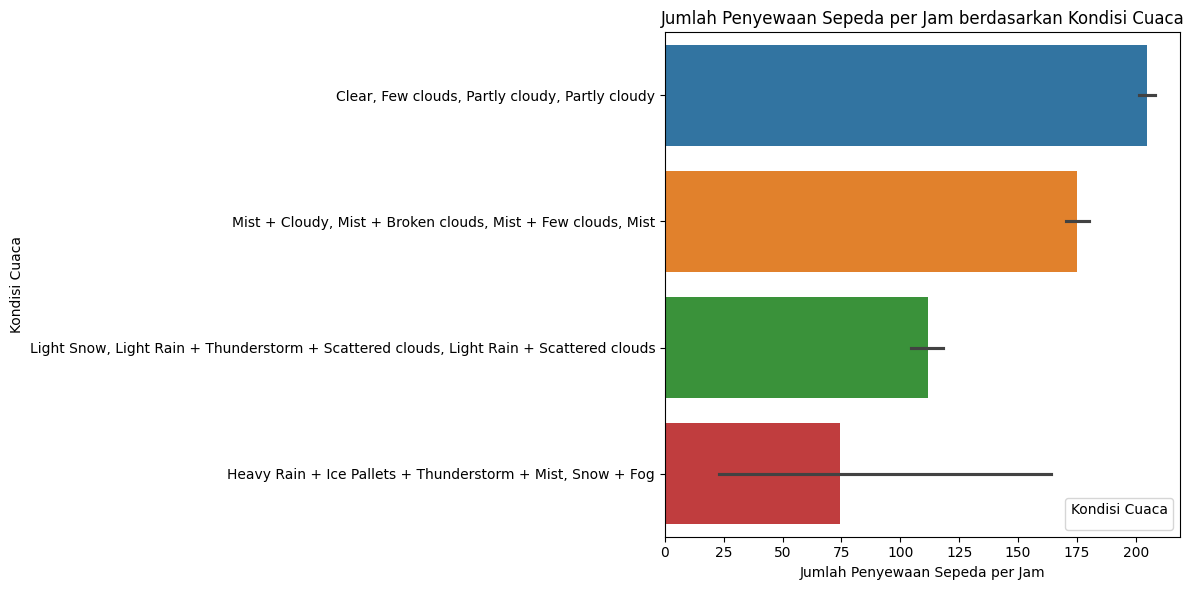

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mergebike_df, x='cnt_hour', y='weathersit_hour', hue='weathersit_hour')
plt.title('Jumlah Penyewaan Sepeda per Jam berdasarkan Kondisi Cuaca')
plt.xlabel('Jumlah Penyewaan Sepeda per Jam')
plt.ylabel('Kondisi Cuaca')
plt.legend(title='Kondisi Cuaca')
plt.tight_layout()
plt.show()


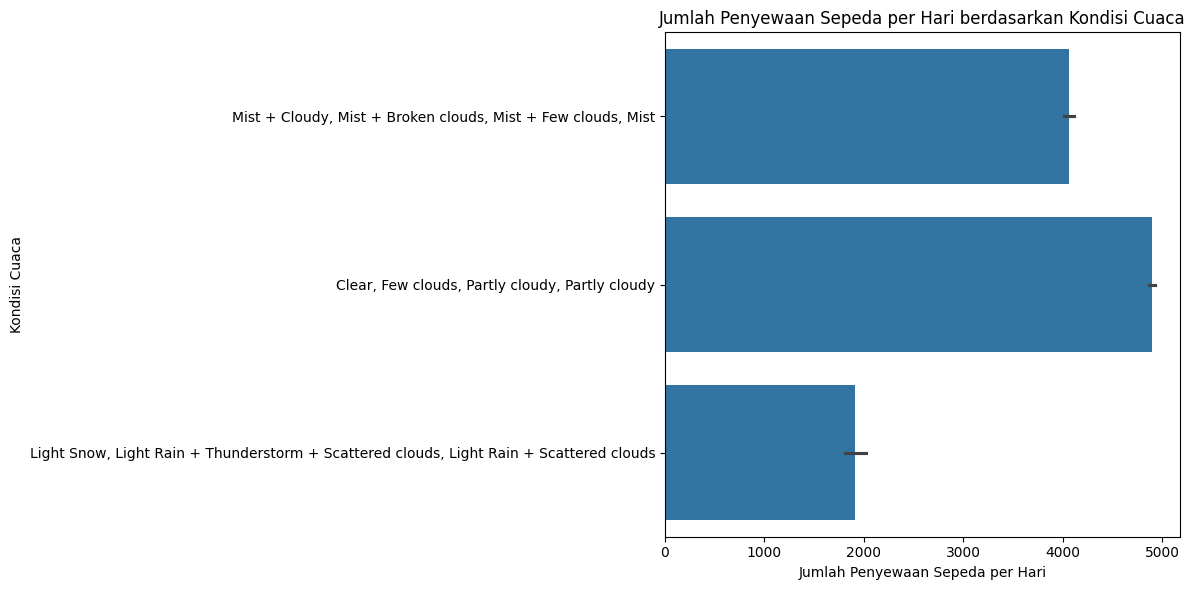

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mergebike_df, x='cnt_day', y='weathersit_day')
plt.title('Jumlah Penyewaan Sepeda per Hari berdasarkan Kondisi Cuaca')
plt.xlabel('Jumlah Penyewaan Sepeda per Hari')
plt.ylabel('Kondisi Cuaca')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?

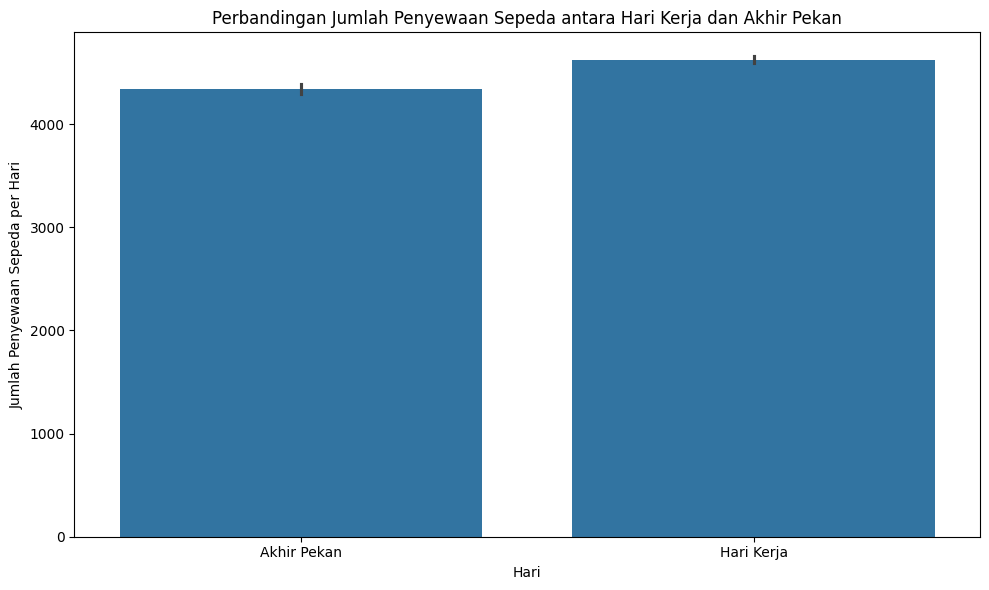

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mergebike_df, x='workingday_day', y='cnt_day')
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda per Hari')
plt.xticks(ticks=[1, 0], labels=['Hari Kerja', 'Akhir Pekan'])
plt.tight_layout()
plt.show()

In [40]:
t_stat, p_value = ttest_ind(weekday_rentals, weekend_rentals)
print("\nHasil Uji Statistik (t-value):", t_stat)
print("Nilai p-value:", p_value)
if p_value < 0.05:
    print("Perbedaan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan signifikan secara statistik.")
else:
    print("Tidak ada perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan.")


Hasil Uji Statistik (t-value): 9.013359645059515
Nilai p-value: 2.201893876060441e-19
Perbedaan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan signifikan secara statistik.


### Pertanyaan 3: Pada musim apa penyewaan sepeda meningkat signifikan?

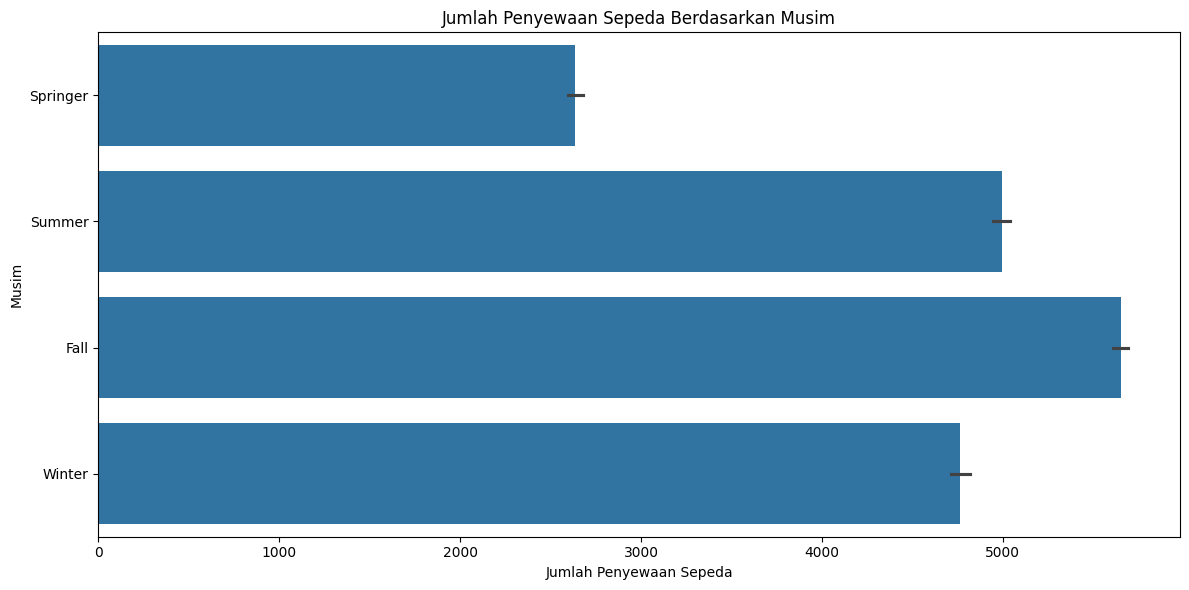

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mergebike_df, x='cnt_day', y='season_day')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Musim')
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana pola jumlah penyewaan sepeda berbeda-beda berdasarkan musim dan hari kerja?

Teknik Analisis Lanjutan: Clustering

In [42]:
clustered_data = mergebike_df.groupby(['season_day', 'workingday_day']).mean().reset_index()

<ipython-input-42-2927eaf4749a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clustered_data = mergebike_df.groupby(['season_day', 'workingday_day']).mean().reset_index()


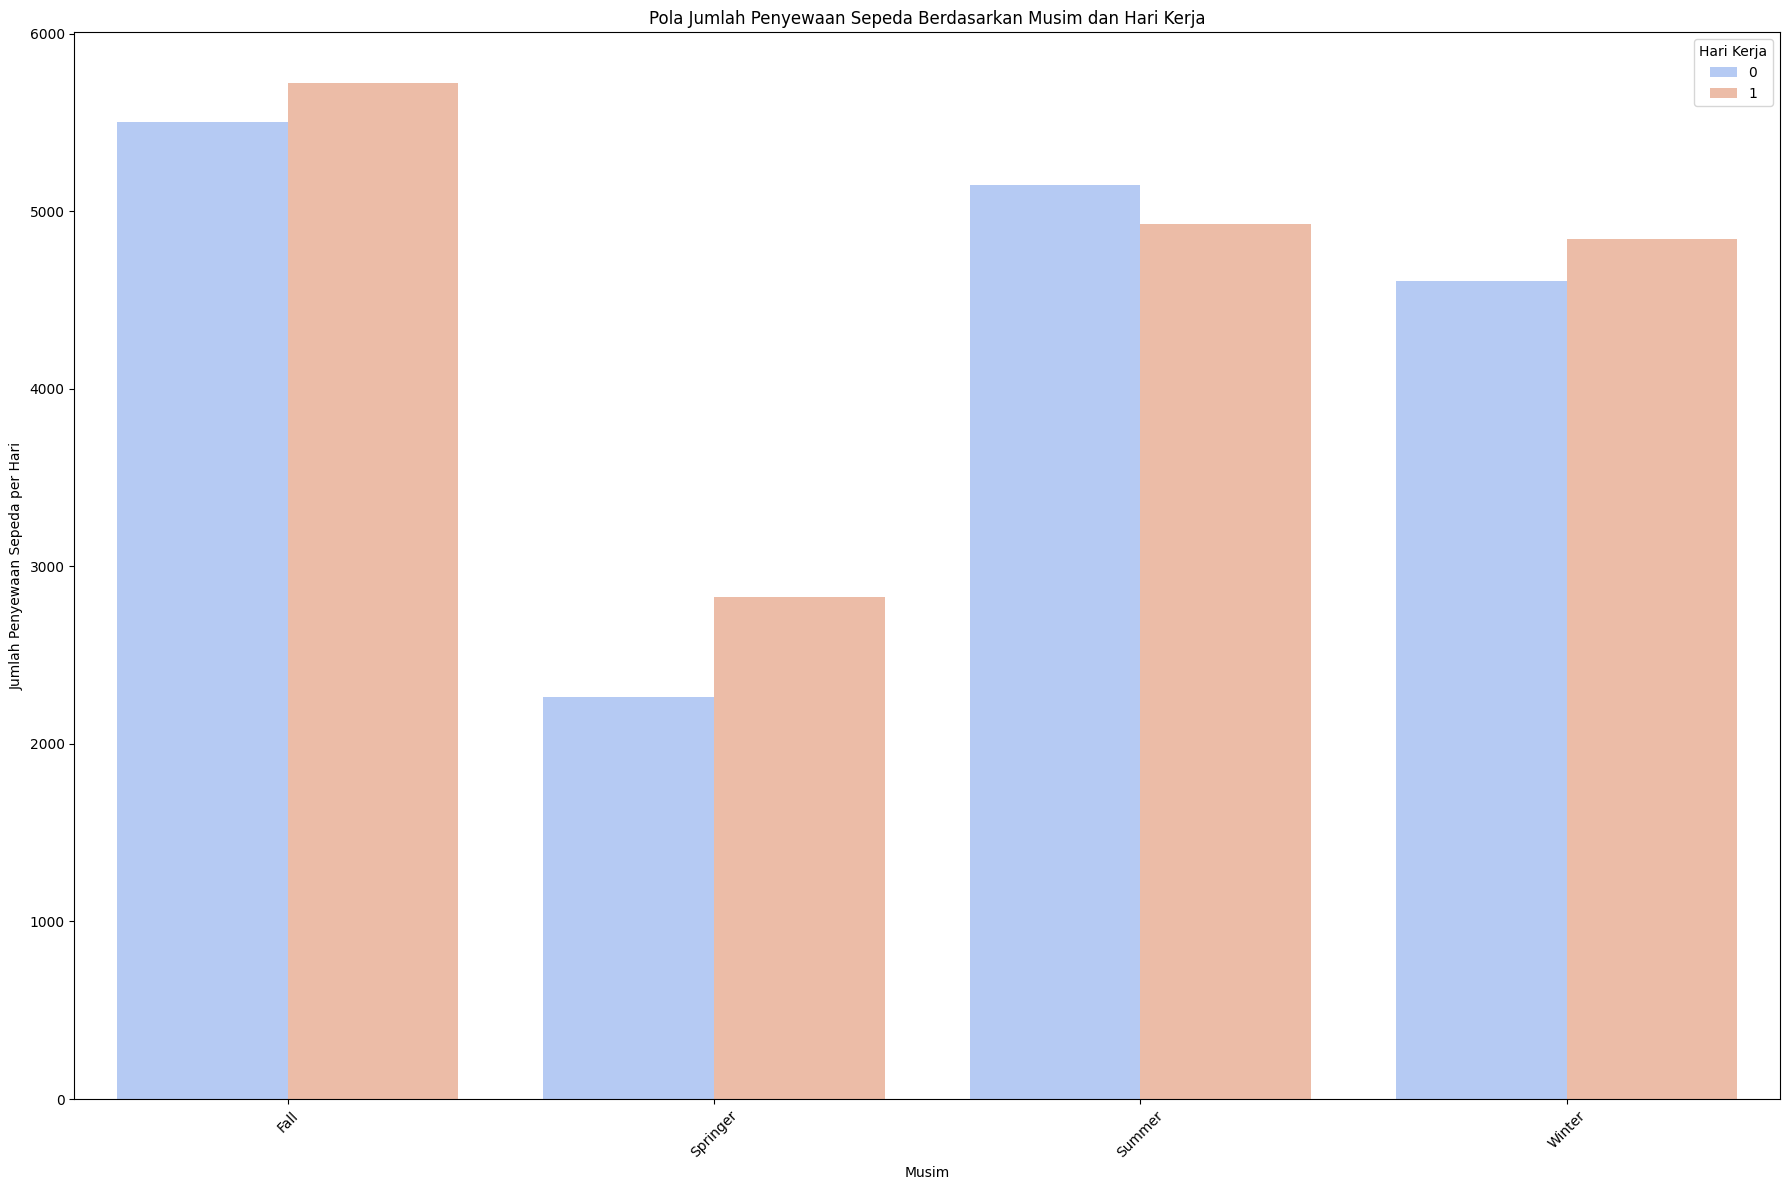

In [43]:
plt.figure(figsize=(18, 12))
sns.barplot(data=clustered_data, x='season_day', y='cnt_day', hue='workingday_day', palette='coolwarm')
plt.title('Pola Jumlah Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda per Hari')
plt.xticks(rotation=45)
plt.legend(title='Hari Kerja', loc='upper right')
plt.tight_layout()
plt.show()

Hari kerja 0 (biru) artinya libur/tidak bekerja sedangkan hari kerja 1 (orange) adalah hari kerja.

## Conclusion

- Conclusion pertanyaan 1 Bagaimana hubungan antara kondisi cuaca dalam per hari dan per jam dengan jumlah penyewaan sepeda?
> Kondisi cuaca dalam per hari dan per jam berhubungan erat dengan jumlah penyewaan sepeda. Jumlah penyewaan sepeda terbanyak terjadi pada saat cuaca cerah (Clear, Few clouds, Partly cloudy, Partly cloudy). Hal ini mengindikasikan kondisi cuaca berkaitan erat dengan jumlah penyewaan. Apabila cuaca buruk, jumlah dalam hitungan jam maupun hari, jumlah penyewaan sepeda pun menurun. Aktivitas luar ruangan seringkali memanfaatkan sepeda dalam keadaan cuaca cerah sehingga tidak terganggu oleh cuaca yang tidak bersahabat.

- Conclusion pertanyaan 2 Bagaimana perbedaan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan?
> Perbedaan dalam pola penggunaan sepeda antara hari kerja dan hari libur terlihat signifikan. Jumlah penyewa sepeda lebih banyak ketika hari kerja daripada hari libur. Hal ini dapat disebabkan oleh para pekerja lebih nyaman berangkat kerja dengan menggunakan sepeda. Hari kerja juga menjadi hari aktif semua orang sehingga tidak dipungkiri jika penyewaan sepeda lebih ramai di hari kerja. Uji statistik dengan nilai p-value lebih kecil t-statistik mengartikan adanya penolakan hipotesis nol (tidak ada perbedaan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan). Dengan demikian, kesimpulannya terdapat perbedaan signifikan antara jumlah penyewaan sepeda pada hari kerja dengan hari libur.

- Conclusion pertanyaan 3 Pada musim apa penyewaan sepeda meningkat signifikan?
> Jumlah penyewaan sepeda meningkat dengan signifikan pada musim gugur (Fall). Pada musim gugur (Fall) cuaca menjadi cerah sehingga memungkinkan peningkatan signifikan pada penyewaan sepeda.

- Conclusion pertanyaan 4 Bagaimana pola jumlah penyewaan sepeda berbeda-beda berdasarkan musim dan hari kerja?
> Jika dilihat berdasarkan musim dan hari kerja, pada musim gugur jumlah penyewaan sepeda pada hari kerja tinggi. Namun, saat musim panas jumlah penyewaan saat hari libur (tidak bekerja) lebih banyak dibandingkan dengan hari kerja saat musim panas. Sebaliknya, saat musim dingin jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Peningkatan jumlah penyewaan sepeda pada musim tertentu bisa jadi disebabkan oleh faktor alam seperti jalanan bersalju menyebabkan kendaraan tidak dapat berjalan dengan normal sehingga banyak yang memilih penyewaan sepeda pada hari kerja, cuaca cerah pada musim tertentu, dan liburan musim panas.
